In [1]:
import cv2
import numpy as np
from IPython import display
from matplotlib import pyplot as plt


def imshow(img, format=".jpg", **kwargs):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    img = cv2.imencode(format, img)[1]
    img = display.Image(img, **kwargs)
    display.display(img)


# 画像を読み込む。
img = cv2.imread("./before/spiano.jpg")

# グレースケールに変換する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2値化する
#ret, bin_img = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
#imshow(bin_img)
# 大津の手法
ret, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, binary = cv2.threshold(gray, ret, 255, cv2.THRESH_BINARY)
print(f"threshold: {ret}") 
imshow(binary)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


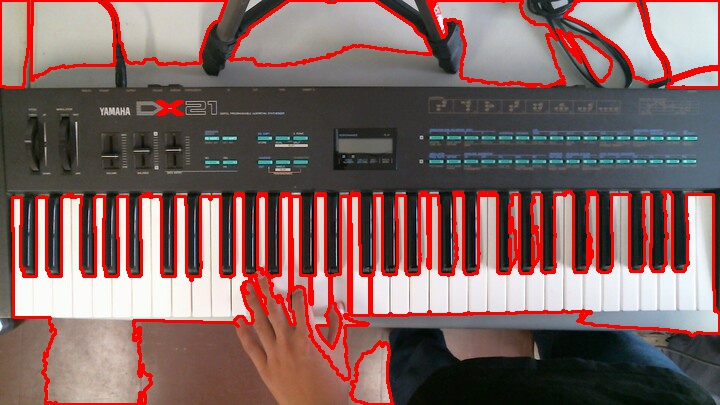

In [50]:
# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 100, contours))

# 輪郭を描画する。
cv2.drawContours(img, contours, -1, color=(0, 0, 255), thickness=2)

imshow(img)